In [2]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')
from scipy.spatial.distance import braycurtis, jaccard, hamming
import os
import scipy

# Read taxonomy data

In [5]:
df_tax = pd.read_csv('filtered_data/taxonomy.csv')
df_tax.head()

,ASV,Taxon,Confidence,LowestTaxonomy,Kingdom,Phylum,Class,Order,Family,Genus,HexColor,ColorOrder
0,004d919d8ff500a00bfe768062d3e30a,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.998584,g__A2,Bacteria,Firmicutes,Clostridia,Lachnospirales,Lachnospiraceae,A2,#BEA89A,76
1,007a974b0637bc17763c30e89fbe0fec,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.999966,f__Lachnospiraceae,Bacteria,Firmicutes,Clostridia,Lachnospirales,Lachnospiraceae,<not present>,#BEA89A,76
2,00a583fe681a4d78d25ef121e81b84a4,d__Bacteria; p__Firmicutes; c__Bacilli; o__Lac...,0.999996,g__Streptococcus,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,#8CA530,10
3,00a5c431e0a197d80a5518bd920f3dc7,d__Bacteria; p__Actinobacteriota; c__Coriobact...,0.900541,f__Atopobiaceae,Bacteria,Actinobacteriota,Coriobacteriia,Coriobacteriales,Atopobiaceae,<not present>,#D0D0D0,118
4,00cd29ad3fd41851b4f7804631dd1f5b,d__Bacteria; p__Actinobacteriota; c__Thermoleo...,0.999852,g__Solirubrobacter,Bacteria,Actinobacteriota,Thermoleophilia,Solirubrobacterales,Solirubrobacteraceae,Solirubrobacter,#D0D0D0,118


# Read count data

In [6]:
df_count = pd.read_csv("filtered_data/count.csv", index_col=0)
df_count = df_count[list(df_tax.ASV)]
df_count = df_count.loc[:, (df_count != 0).any(axis=0)]
print("minimum total count = %d" % df_count.sum(axis=1).min())
df_relabun = df_count.div(df_count.sum(axis=1), axis=0)
df_relabun

minimum total count = 2047


,004d919d8ff500a00bfe768062d3e30a,007a974b0637bc17763c30e89fbe0fec,00a583fe681a4d78d25ef121e81b84a4,00a5c431e0a197d80a5518bd920f3dc7,00cd29ad3fd41851b4f7804631dd1f5b,0136150ffab375d5100f0094589b6e1f,014e3bfa7c3d837fe741cd216b8637e3,016e64817806d73a9f07ec0f7a432509,0171c49f232c4b734f10100962c587bb,01f801067c6d90ab4699f775ac0e094c,...,fca43ae298fbf3b41a5b19285216226d,fcbb0531ce1dcff151facc9e35c6b578,fccdbf4c8f3755a6b60e883e43a87059,fd85add8bdf7ba7a7fc1d0144fe8605b,fdc4b40b28811d7ea64ca6ff3c708796,fdde0c9bbb1881de5ab40f43e8e946ca,fe43ab43fff17ffed8a5a08f9f9d2678,fed87534ae7f10e4a968cf22b21910f0,ff0dc710d23307d8c8a92d69d80f8ffe,fff1529c1496c85afda01e3c70aa56ad
KP_Exp_8_D0_AVN1,0.000000,0.000738,0.000000,0.000000,0.00000,0.000000,0.000375,0.000291,0.000000,0.000230,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000012,0.000000,0.000000
KP_Exp_8_D0_OR_AVN1,0.000000,0.000000,0.067019,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
KP_Exp_8_D8_AVN1,0.000000,0.000000,0.044066,0.000000,0.00000,0.001222,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000575,0.000000,0.001294,0.00000,0.000000,0.000000,0.000000,0.000000
KP_Exp_8_D0_AVN2,0.000000,0.001015,0.000000,0.000000,0.00000,0.000000,0.000125,0.000514,0.000000,0.000292,...,0.000626,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.006868
KP_Exp_8_D0_OR_AVN2,0.000000,0.000308,0.069380,0.000000,0.00000,0.000000,0.000000,0.000000,0.008798,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000023,0.000000
KP_Exp_8_D8_AVN2,0.000000,0.000000,0.070377,0.000120,0.00018,0.000751,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00009,0.000571,0.000000,0.000000,0.00012,0.000000,0.000000,0.000000,0.000000
KP_Exp_8_D0_AVN3,0.000283,0.002265,0.000000,0.000000,0.00000,0.000000,0.000000,0.000189,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
KP_Exp_8_D0_OR_AVN3,0.000000,0.001954,0.002443,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
KP_Exp_8_D8_AVN3,0.000000,0.000000,0.075967,0.000298,0.00000,0.000597,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000429,0.000354,0.000000,0.00000,0.000392,0.000000,0.000000,0.000000


# Create metadata table

In [7]:
df_meta = pd.DataFrame(
    [
    ['KP_Exp_8_D0_AVN1','AVN1',0,'Feces'],
    ['KP_Exp_8_D0_OR_AVN1','AVN1',0,'Oral'],
    ['KP_Exp_8_D8_AVN1','AVN1',8,'Feces'],
    ['KP_Exp_8_D0_AVN2','AVN2',0,'Feces'],
    ['KP_Exp_8_D0_OR_AVN2','AVN2',0,'Oral'],
    ['KP_Exp_8_D8_AVN2','AVN2',8,'Feces'],
    ['KP_Exp_8_D0_AVN3','AVN3',0,'Feces'],
    ['KP_Exp_8_D0_OR_AVN3','AVN3',0,'Oral'],
    ['KP_Exp_8_D8_AVN3','AVN3',8,'Feces']],
    columns = ['SampleID','Mouse','Day','BodySite']).set_index('SampleID')
df_qpcr = pd.read_excel("filtered_data/16S_qPCR_calculation_table.xlsx").rename({'Sample':'SampleID','16S_qPCR_per_g':'qPCR'},axis=1).set_index('SampleID')
df_meta = pd.merge(df_meta, df_qpcr[['qPCR']], left_index=True, right_index=True, how='left')
df_meta

,Mouse,Day,BodySite,qPCR
SampleID,,,,
KP_Exp_8_D0_AVN1,AVN1,0,Feces,4.195976e+11
KP_Exp_8_D0_OR_AVN1,AVN1,0,Oral,NaN
KP_Exp_8_D8_AVN1,AVN1,8,Feces,1.743481e+08
KP_Exp_8_D0_AVN2,AVN2,0,Feces,4.947265e+11
KP_Exp_8_D0_OR_AVN2,AVN2,0,Oral,NaN
KP_Exp_8_D8_AVN2,AVN2,8,Feces,1.466698e+08
KP_Exp_8_D0_AVN3,AVN3,0,Feces,5.364923e+11
KP_Exp_8_D0_OR_AVN3,AVN3,0,Oral,NaN
KP_Exp_8_D8_AVN3,AVN3,8,Feces,1.010414e+08


# Barplot of microbiome states

e8aae590cf49eb3c80ad7e08f2d3c3c4 Lactobacillus
37f274fa02f81fc4108235c98ab0806d Unknown Bacteria
d10665c9b8ce985ef0f24354e96ba959 Dubosiella
e8aae590cf49eb3c80ad7e08f2d3c3c4 Lactobacillus


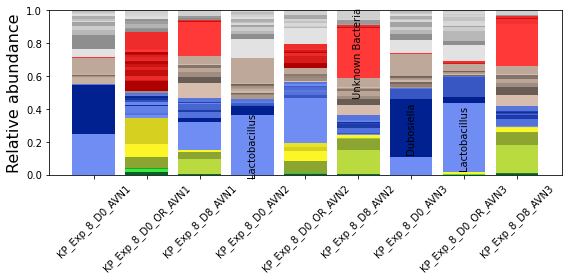

In [8]:
unique_color = df_tax[['HexColor','ColorOrder']].drop_duplicates().sort_values(by='ColorOrder').reset_index(drop=True)
color_grouped_abundance = np.zeros((len(df_relabun.index),len(unique_color.index)))
for k,o in enumerate(unique_color.ColorOrder):
    currsum = df_relabun[set(df_relabun.columns).intersection(set(df_tax.loc[df_tax.ColorOrder==o,'ASV']))].sum(axis=1).values
    color_grouped_abundance[:,k] = currsum
color_grouped_abundance = pd.DataFrame(color_grouped_abundance, index=df_relabun.index, columns=unique_color.HexColor)

fig, ax = plt.subplots(figsize=(8,4))
for k,color in enumerate(color_grouped_abundance.columns):
    _ = ax.bar(color_grouped_abundance.index, color_grouped_abundance[color], width=0.8, bottom=color_grouped_abundance.iloc[:,0:k].sum(axis=1), color=color)
_ = ax.tick_params(axis='x', labelrotation=45)

# add text
dominant_taxa_indices = np.argwhere(df_relabun.values>=0.3)
for index_pair in dominant_taxa_indices:
    curr_row = index_pair[0]
    curr_col = index_pair[1]
    dominant_tax = df_tax.loc[df_tax.ASV==df_relabun.columns[curr_col],'Genus'].values[0]
    if dominant_tax=='<not present>':
        try_higher_level_classification = {'Family', 'Order', 'Class', 'Phylum', 'Kingdom', 'ASV'};
        for higher_tax in try_higher_level_classification:
            dominant_tax = list(df_tax.loc[df_tax.ASV==df_relabun.columns[curr_col],higher_tax])[0]
            if (dominant_tax != '<not present>'):
                break
        dominant_tax = 'Unknown '+dominant_tax
    curr_color = df_tax.loc[df_tax.ASV==df_relabun.columns[curr_col],'HexColor'].values[0]
    curr_box = list(unique_color[unique_color.HexColor==curr_color].index)[0]
    cum_sum_cmap = np.cumsum(color_grouped_abundance.iloc[curr_row,:])
    heightbefore = np.append(0,cum_sum_cmap[0:-1])
    heightafter = np.array(cum_sum_cmap)
    #print(curr_box, color_grouped_abundance.index[curr_row], (heightafter[curr_box]+heightbefore[curr_box])/2, dominant_tax)
    print(df_relabun.columns[curr_col], dominant_tax)
    _ = ax.text(color_grouped_abundance.index[curr_row], 
               (heightafter[curr_box]+heightbefore[curr_box])/2, 
               dominant_tax,
               rotation=90,
               horizontalalignment='center',
               verticalalignment='center')
_ = ax.set_ylim([0,1])
_ = ax.set_ylabel('Relative abundance', fontsize=16)
_ = ax.set_yticks(np.linspace(0,1,6))

plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
fig.savefig("stacked_barplot.svg", dpi=600, bbox_inches='tight')

# Braycurtis distance

In [9]:
for mouse in ['AVN1','AVN2','AVN3']:
    print(mouse)
    print("fecal_d8 vs fecal_d0: %2.2f" % braycurtis(df_relabun.loc['KP_Exp_8_D8_%s'% mouse], df_relabun.loc['KP_Exp_8_D0_%s'% mouse]))
    print("fecal_d8 vs oral_d0: %2.2f" % braycurtis(df_relabun.loc['KP_Exp_8_D8_%s'% mouse], df_relabun.loc['KP_Exp_8_D0_OR_%s'% mouse]))

AVN1
fecal_d8 vs fecal_d0: 0.79
fecal_d8 vs oral_d0: 0.87
AVN2
fecal_d8 vs fecal_d0: 0.97
fecal_d8 vs oral_d0: 0.86
AVN3
fecal_d8 vs fecal_d0: 0.99
fecal_d8 vs oral_d0: 0.98


In [10]:
df2 = df_relabun.loc[[x for x in df_relabun.index if 'AVN1' in x]].T
df2['relabun_max'] = df2.max(axis=1)
df2[df2.relabun_max > 0.05]

,KP_Exp_8_D0_AVN1,KP_Exp_8_D0_OR_AVN1,KP_Exp_8_D8_AVN1,relabun_max
00a583fe681a4d78d25ef121e81b84a4,0.000000,0.067019,0.044066,0.067019
0ebb9e370e0e9d170067c9433c277d8e,0.000000,0.000000,0.093020,0.093020
14ac4eaad5b4e2ff3c071832e0fd4229,0.086483,0.014676,0.011070,0.086483
1bd1cddef3a57ec1046eb77c8070a9df,0.000000,0.057333,0.000000,0.057333
37f274fa02f81fc4108235c98ab0806d,0.000242,0.000000,0.209762,0.209762
64403407f0c77290b58e93d8a55323bc,0.000000,0.154290,0.000000,0.154290
6e05565af0e496c84106ec317e8e35ff,0.000000,0.000000,0.092445,0.092445
d10665c9b8ce985ef0f24354e96ba959,0.296262,0.000000,0.020272,0.296262
e8aae590cf49eb3c80ad7e08f2d3c3c4,0.246108,0.024068,0.171088,0.246108
eba523a4a554db4ad7e9dcff257bf1c8,0.000048,0.077488,0.012508,0.077488


# Hamming distance

In [11]:
for mouse in ['AVN1','AVN2','AVN3']:
    print(mouse)
    print("fecal_d8 vs fecal_d0: %2.2f" % hamming(df_relabun.loc['KP_Exp_8_D8_%s'% mouse]>0, df_relabun.loc['KP_Exp_8_D0_%s'% mouse]>0))
    print("fecal_d8 vs oral_d0: %2.2f" % hamming(df_relabun.loc['KP_Exp_8_D8_%s'% mouse]>0, df_relabun.loc['KP_Exp_8_D0_OR_%s'% mouse]>0))

AVN1
fecal_d8 vs fecal_d0: 0.35
fecal_d8 vs oral_d0: 0.23
AVN2
fecal_d8 vs fecal_d0: 0.50
fecal_d8 vs oral_d0: 0.35
AVN3
fecal_d8 vs fecal_d0: 0.44
fecal_d8 vs oral_d0: 0.33


# Compute slope in log-log space

In [13]:
df_blast_100 = pd.read_csv("filtered_data/blast_fMOMD/blast_fMOMD_p100.txt", sep="\t", comment="#", header=None)
df_blast_100.columns = ['query_accver', 'subject_accver', 'perc_identity', 'alignment_length', 'mismatches', 'gap_opens', 'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']
df_meta_oral = pd.merge(df_meta, df_relabun[list(set(df_blast_100.query_accver).intersection(df_relabun.columns))].sum(axis=1).to_frame().rename({0:'OralFrac'}, axis=1), left_index=True, right_index=True)
df_meta_oral['log10_OralFrac'] = np.log10(df_meta_oral['OralFrac'])
df_meta_oral['log10_qPCR'] = np.log10(df_meta_oral['qPCR'])
df_meta_oral['Label'] = [x+str(y) for x,y in zip(df_meta_oral.BodySite, df_meta_oral.Day)]
df_meta_oral.sort_values(['BodySite','Day'])

,Mouse,Day,BodySite,qPCR,OralFrac,log10_OralFrac,log10_qPCR,Label
KP_Exp_8_D0_AVN1,AVN1,0,Feces,4.195976e+11,0.000593,-3.226816,11.622833,Feces0
KP_Exp_8_D0_AVN2,AVN2,0,Feces,4.947265e+11,0.000028,-4.555868,11.694365,Feces0
KP_Exp_8_D0_AVN3,AVN3,0,Feces,5.364923e+11,0.000330,-3.481012,11.729563,Feces0
KP_Exp_8_D8_AVN1,AVN1,8,Feces,1.743481e+08,0.140680,-0.851768,8.241417,Feces8
KP_Exp_8_D8_AVN2,AVN2,8,Feces,1.466698e+08,0.180554,-0.743393,8.166341,Feces8
KP_Exp_8_D8_AVN3,AVN3,8,Feces,1.010414e+08,0.206671,-0.684720,8.004499,Feces8
KP_Exp_8_D0_OR_AVN1,AVN1,0,Oral,NaN,0.235985,-0.627116,NaN,Oral0
KP_Exp_8_D0_OR_AVN2,AVN2,0,Oral,NaN,0.119694,-0.921929,NaN,Oral0
KP_Exp_8_D0_OR_AVN3,AVN3,0,Oral,NaN,0.009770,-2.010088,NaN,Oral0


# Plot sources of fecal D8 samples

In [14]:
# sequence categories: from oral only, from gut only, from both, from neither
res=[]
for mouse in ['AVN1','AVN2','AVN3']:
    gut_d0 = 'KP_Exp_8_D0_'+mouse
    oral_d0 = 'KP_Exp_8_D0_OR_'+mouse
    gut_d8 = 'KP_Exp_8_D8_'+mouse
    
    gut_d0_seqs = set(df_relabun.loc[gut_d0][df_relabun.loc[gut_d0]>0].index)
    oral_d0_seqs = set(df_relabun.loc[oral_d0][df_relabun.loc[oral_d0]>0].index)
    gut_d8_seqs = set(df_relabun.loc[gut_d8][df_relabun.loc[gut_d8]>0].index)
    
    oral_only = gut_d8_seqs.intersection(oral_d0_seqs)-gut_d0_seqs
    #assert len(oral_only-{'eba523a4a554db4ad7e9dcff257bf1c8', '00a583fe681a4d78d25ef121e81b84a4'})==0
    gut_only = gut_d8_seqs.intersection(gut_d0_seqs)-oral_d0_seqs
    from_both = gut_d8_seqs.intersection(oral_d0_seqs).intersection(gut_d0_seqs)
    from_neither = gut_d8_seqs-gut_d0_seqs-oral_d0_seqs
    assert len(oral_only)+len(gut_only)+len(from_both)+len(from_neither)==len(gut_d8_seqs)
    
    res.append([gut_d8,
            df_relabun.loc[gut_d8,oral_only].sum(),
            df_relabun.loc[gut_d8,gut_only].sum(),
            df_relabun.loc[gut_d8,from_both].sum(),
            df_relabun.loc[gut_d8,from_neither].sum()
           ])
df_res = pd.DataFrame(res, columns=['SampleID','OralOnly','GutOnly','FromBoth','FromNeither']).set_index('SampleID')
df_res

,OralOnly,GutOnly,FromBoth,FromNeither
SampleID,,,,
KP_Exp_8_D8_AVN1,0.105528,0.238013,0.229746,0.426713
KP_Exp_8_D8_AVN2,0.196203,0.470383,0.010002,0.323411
KP_Exp_8_D8_AVN3,0.105593,0.489832,0.002724,0.401851


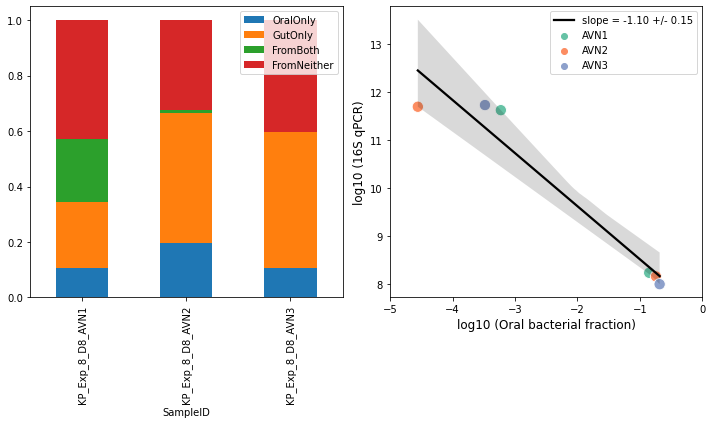

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

# oral bacteria fraction
_ = df_res.plot(kind='bar', stacked=True, color=sns.color_palette()[0:4], ax=ax[0])

# oral fraction vs qPCR
df_meta_oral_no_oral = df_meta_oral[df_meta_oral.qPCR.notnull()]
_ = sns.scatterplot(x="log10_OralFrac", y="log10_qPCR", hue='Mouse', data=df_meta_oral_no_oral, ax=ax[1],s=128, palette='Set2')
fit = scipy.stats.linregress(x=df_meta_oral_no_oral.log10_OralFrac, y=df_meta_oral_no_oral.log10_qPCR)
_ = sns.regplot(x="log10_OralFrac", y="log10_qPCR", data=df_meta_oral_no_oral, ax=ax[1], color='k', scatter=False, label='slope = %2.2f +/- %2.2f' % (fit.slope, fit.stderr))
_ = ax[1].legend()
_ = ax[1].set_xlabel('log10 (Oral bacterial fraction)', fontsize=12)
_ = ax[1].set_ylabel('log10 (16S qPCR)', fontsize=12)
_ = ax[1].set_xlim([-5,0])

plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
fig.savefig("asv_transmitted_slope_linear.svg", dpi=600, bbox_inches='tight')

# Plot composition of oral only fractions

In [19]:
df_relabun2 = deepcopy(df_relabun).loc[['KP_Exp_8_D8_AVN1', 'KP_Exp_8_D8_AVN2', 'KP_Exp_8_D8_AVN3']]

# find all "oral-only" sequences
oral_only_asvs_all = []
for mouse in ['AVN1','AVN2','AVN3']:
    gut_d0 = 'KP_Exp_8_D0_'+mouse
    oral_d0 = 'KP_Exp_8_D0_OR_'+mouse
    gut_d8 = 'KP_Exp_8_D8_'+mouse
    
    gut_d0_seqs = set(df_relabun.loc[gut_d0][df_relabun.loc[gut_d0]>0].index)
    oral_d0_seqs = set(df_relabun.loc[oral_d0][df_relabun.loc[oral_d0]>0].index)
    gut_d8_seqs = set(df_relabun.loc[gut_d8][df_relabun.loc[gut_d8]>0].index)
    
    oral_only = gut_d8_seqs.intersection(oral_d0_seqs)-gut_d0_seqs
    oral_only_asvs_all.extend(list(oral_only))
    
    df_relabun2.loc[gut_d8, set(df_relabun2.columns)-oral_only] = 0
    
oral_only_asvs_all = set(oral_only_asvs_all)
df_relabun2 = df_relabun2[oral_only_asvs_all]
to_highlight = ["aef4ca57ea489e240db68158512cd8a3",
                "00a583fe681a4d78d25ef121e81b84a4",
                "581ba997876ce7f41aeb6a1b48cbd4ea",
                "691fbfae6115903959dd620f17dc9e22",
                "eba523a4a554db4ad7e9dcff257bf1c8",
                "0ebb9e370e0e9d170067c9433c277d8e"]
df_relabun2 = pd.merge(df_relabun2[to_highlight], df_relabun2[[col for col in df_relabun2.columns if col not in to_highlight]].sum(axis=1).to_frame().rename({0:'fd85add8bdf7ba7a7fc1d0144fe8605b'}, axis=1),
                       left_index=True, right_index=True, how='inner')
df_relabun2.head()

,aef4ca57ea489e240db68158512cd8a3,00a583fe681a4d78d25ef121e81b84a4,581ba997876ce7f41aeb6a1b48cbd4ea,691fbfae6115903959dd620f17dc9e22,eba523a4a554db4ad7e9dcff257bf1c8,0ebb9e370e0e9d170067c9433c277d8e,fd85add8bdf7ba7a7fc1d0144fe8605b
KP_Exp_8_D8_AVN1,0.014952,0.044066,0.029114,0.000000,0.000000,0.000000,0.017396
KP_Exp_8_D8_AVN2,0.000000,0.070377,0.017482,0.030788,0.019494,0.056019,0.002043
KP_Exp_8_D8_AVN3,0.000000,0.075967,0.000000,0.000000,0.027182,0.000000,0.002444


aef4ca57ea489e240db68158512cd8a3 Lactobacillus
00a583fe681a4d78d25ef121e81b84a4 Streptococcus
581ba997876ce7f41aeb6a1b48cbd4ea Peptostreptococcus
fd85add8bdf7ba7a7fc1d0144fe8605b Methylobacterium-Methylorubrum
00a583fe681a4d78d25ef121e81b84a4 Streptococcus
581ba997876ce7f41aeb6a1b48cbd4ea Peptostreptococcus
691fbfae6115903959dd620f17dc9e22 Weissella
eba523a4a554db4ad7e9dcff257bf1c8 Staphylococcus
0ebb9e370e0e9d170067c9433c277d8e Anaerococcus
00a583fe681a4d78d25ef121e81b84a4 Streptococcus
eba523a4a554db4ad7e9dcff257bf1c8 Staphylococcus


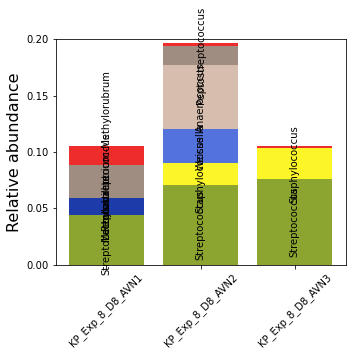

In [20]:
unique_color = df_tax[['HexColor','ColorOrder']].drop_duplicates().sort_values(by='ColorOrder').reset_index(drop=True)
color_grouped_abundance = np.zeros((len(df_relabun2.index),len(unique_color.index)))
for k,o in enumerate(unique_color.ColorOrder):
    currsum = df_relabun2[set(df_relabun2.columns).intersection(set(df_tax.loc[df_tax.ColorOrder==o,'ASV']))].sum(axis=1).values
    color_grouped_abundance[:,k] = currsum
color_grouped_abundance = pd.DataFrame(color_grouped_abundance, index=df_relabun2.index, columns=unique_color.HexColor)

fig, ax = plt.subplots(figsize=(5,5))
for k,color in enumerate(color_grouped_abundance.columns):
    _ = ax.bar(color_grouped_abundance.index, color_grouped_abundance[color], width=0.8, bottom=color_grouped_abundance.iloc[:,0:k].sum(axis=1), color=color)
_ = ax.tick_params(axis='x', labelrotation=45)

# add text
dominant_taxa_indices = np.argwhere(df_relabun2.values>=0.01)
for index_pair in dominant_taxa_indices:
    curr_row = index_pair[0]
    curr_col = index_pair[1]
    dominant_tax = df_tax.loc[df_tax.ASV==df_relabun2.columns[curr_col],'Genus'].values[0]
    if dominant_tax=='<not present>':
        try_higher_level_classification = {'Family', 'Order', 'Class', 'Phylum', 'Kingdom', 'ASV'};
        for higher_tax in try_higher_level_classification:
            dominant_tax = list(df_tax.loc[df_tax.ASV==df_relabun2.columns[curr_col],higher_tax])[0]
            if (dominant_tax != '<not present>'):
                break
        dominant_tax = 'Unknown '+dominant_tax
    curr_color = df_tax.loc[df_tax.ASV==df_relabun2.columns[curr_col],'HexColor'].values[0]
    curr_box = list(unique_color[unique_color.HexColor==curr_color].index)[0]
    cum_sum_cmap = np.cumsum(color_grouped_abundance.iloc[curr_row,:])
    heightbefore = np.append(0,cum_sum_cmap[0:-1])
    heightafter = np.array(cum_sum_cmap)
    #print(curr_box, color_grouped_abundance.index[curr_row], (heightafter[curr_box]+heightbefore[curr_box])/2, dominant_tax)
    print(df_relabun2.columns[curr_col], dominant_tax)
    _ = ax.text(color_grouped_abundance.index[curr_row], 
               (heightafter[curr_box]+heightbefore[curr_box])/2, 
               dominant_tax,
               rotation=90,
               horizontalalignment='center',
               verticalalignment='center')
_ = ax.set_ylim([0,0.2])
_ = ax.set_ylabel('Relative abundance', fontsize=16)
_ = ax.set_yticks(np.linspace(0,0.2,5))

plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
fig.savefig("stacked_barplot_oral_only.svg", dpi=600, bbox_inches='tight')

# Plot slope using oral samples after filtering

In [21]:
# determine oral typical
fecal_samples = ['KP_Exp_8_D0_AVN1', 'KP_Exp_8_D0_AVN2', 'KP_Exp_8_D0_AVN3']
oral_samples = ['KP_Exp_8_D0_OR_AVN1', 'KP_Exp_8_D0_OR_AVN2', 'KP_Exp_8_D0_OR_AVN3']

df_relabun_gut_mean = df_relabun.loc[fecal_samples].mean(axis=0)
gut_specific = set(df_relabun_gut_mean[df_relabun_gut_mean>1e-4].index)

df_relabun_oral_mean = df_relabun.loc[oral_samples].mean(axis=0)
oral_specific = set(df_relabun_oral_mean[df_relabun_oral_mean>1e-4].index)

oral_typical = oral_specific-gut_specific

In [22]:
df_meta_oral2 = pd.merge(df_meta, df_relabun[list(oral_typical.intersection(df_relabun.columns))].sum(axis=1).to_frame().rename({0:'OralFrac'}, axis=1), left_index=True, right_index=True)
df_meta_oral2['log10_OralFrac'] = np.log10(df_meta_oral2['OralFrac'])
df_meta_oral2['log10_qPCR'] = np.log10(df_meta_oral2['qPCR'])
df_meta_oral2['Label'] = [x+str(y) for x,y in zip(df_meta_oral2.BodySite, df_meta_oral2.Day)]
df_meta_oral2.sort_values(['BodySite','Day'])

,Mouse,Day,BodySite,qPCR,OralFrac,log10_OralFrac,log10_qPCR,Label
KP_Exp_8_D0_AVN1,AVN1,0,Feces,4.195976e+11,0.000363,-3.439890,11.622833,Feces0
KP_Exp_8_D0_AVN2,AVN2,0,Feces,4.947265e+11,0.000236,-3.626449,11.694365,Feces0
KP_Exp_8_D0_AVN3,AVN3,0,Feces,5.364923e+11,0.000236,-3.627140,11.729563,Feces0
KP_Exp_8_D8_AVN1,AVN1,8,Feces,1.743481e+08,0.249299,-0.603279,8.241417,Feces8
KP_Exp_8_D8_AVN2,AVN2,8,Feces,1.466698e+08,0.270606,-0.567663,8.166341,Feces8
KP_Exp_8_D8_AVN3,AVN3,8,Feces,1.010414e+08,0.296146,-0.528495,8.004499,Feces8
KP_Exp_8_D0_OR_AVN1,AVN1,0,Oral,NaN,0.954212,-0.020355,NaN,Oral0
KP_Exp_8_D0_OR_AVN2,AVN2,0,Oral,NaN,0.496974,-0.303666,NaN,Oral0
KP_Exp_8_D0_OR_AVN3,AVN3,0,Oral,NaN,0.067904,-1.168103,NaN,Oral0


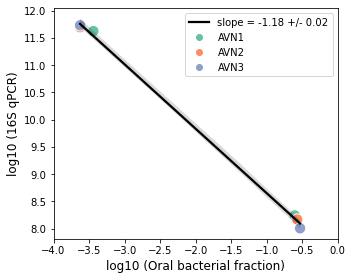

In [24]:
fig, ax = plt.subplots(figsize=(5,4))

df_meta_oral_no_oral2 = df_meta_oral2[df_meta_oral2.qPCR.notnull()]
_ = sns.scatterplot(x="log10_OralFrac", y="log10_qPCR", hue='Mouse', data=df_meta_oral_no_oral2, ax=ax, s=128, palette='Set2')
fit = scipy.stats.linregress(x=df_meta_oral_no_oral2.log10_OralFrac, y=df_meta_oral_no_oral2.log10_qPCR)
_ = sns.regplot(x="log10_OralFrac", y="log10_qPCR", data=df_meta_oral_no_oral2, ax=ax, color='k', scatter=False, label='slope = %2.2f +/- %2.2f' % (fit.slope, fit.stderr))
_ = ax.legend()
_ = ax.set_xlabel('log10 (Oral bacterial fraction)', fontsize=12)
_ = ax.set_ylabel('log10 (16S qPCR)', fontsize=12)
_ = ax.set_xlim([-4,0])

plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
fig.savefig("slope_using_oral_sequence.svg", dpi=600, bbox_inches='tight')